# Machine Learning Final Project

## Part A Algorithmic Trading System using Machine Learning

Group Members :

- Valentin PICAVET - ID : 73161
- Elias HOSNI - ID : 72998
- Julien CANAC - ID : 72814
- Aurelien HUSS - ID : 73003

# Data Preprocessing 

First, we load the data that you gave us and then we handle missing data, bad data or outliers in training data.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("data_training_Project_ML_Finance(3) (1).csv")
df

,Day,Weekday,Macro Environment,ABC,MKV,YYT,PLO,ERS,HUY,MON,AQE,IX50
0,1,Monday,Positive,100.00,56.00,70.00,25.00,64.96,76.12,32.02,23.01,1200.00
1,2,Tuesday,Positive,100.39,55.94,70.80,24.81,64.99,75.98,32.00,23.03,1201.14
2,3,Wednesday,Positive,99.99,55.74,70.01,24.97,64.66,76.29,32.03,23.02,1209.88
3,4,Thurday,Positive,99.73,55.36,71.03,25.09,64.81,76.01,32.04,23.02,1195.59
4,5,Friday,Positive,100.27,55.39,71.12,24.93,65.02,75.83,32.01,23.00,1185.64
...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,Monday,Neutral,117.16,65.65,29.65,24.30,66.33,73.53,31.71,22.68,1822.46
746,747,Tuesday,Neutral,117.06,65.65,29.34,24.16,66.43,73.50,31.71,22.69,1833.02
747,748,Wednesday,Neutral,116.87,65.02,28.89,24.33,66.27,73.67,31.74,22.69,1829.48
748,749,Thurday,Neutral,116.94,64.49,29.25,24.54,66.28,73.64,31.75,22.70,1827.91


In [7]:
df.dtypes

Day                    int64
Weekday               object
Macro Environment     object
ABC                  float64
MKV                  float64
YYT                  float64
PLO                  float64
ERS                  float64
HUY                  float64
MON                  float64
AQE                  float64
IX50                 float64
dtype: object

In [8]:
df.isna().sum()

Day                  0
Weekday              0
Macro Environment    0
ABC                  0
MKV                  1
YYT                  0
PLO                  0
ERS                  0
HUY                  0
MON                  0
AQE                  0
IX50                 0
dtype: int64

We see that we have one cell in the column 'MKV' that is missing a data.

We use the function `unique` to know the distinct values present in the columns 'Weekday' and 'Macro Environment'.

In [9]:
df.Weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'thursday',
       '?'], dtype=object)

We see that we have '?' values and Thurday

In [10]:
df["Macro Environment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

The column is clean, we will just replace Negative by 0, Neutral by 1 and Positive by 2. That's what our macroEnv function does.

In [11]:
def macroEnv(x):
  if x == 'Positive':
    return (2)
  elif x == 'Neutral':
    return(1)
  else:
    return(0)
df["Macro Environment"] = df["Macro Environment"].apply(macroEnv)
df.head(5)

,Day,Weekday,Macro Environment,ABC,MKV,YYT,PLO,ERS,HUY,MON,AQE,IX50
0,1,Monday,2,100.00,56.00,70.00,25.00,64.96,76.12,32.02,23.01,1200.00
1,2,Tuesday,2,100.39,55.94,70.80,24.81,64.99,75.98,32.00,23.03,1201.14
2,3,Wednesday,2,99.99,55.74,70.01,24.97,64.66,76.29,32.03,23.02,1209.88
3,4,Thurday,2,99.73,55.36,71.03,25.09,64.81,76.01,32.04,23.02,1195.59
4,5,Friday,2,100.27,55.39,71.12,24.93,65.02,75.83,32.01,23.00,1185.64


Then, we replace the value that is missing in the column 'MKV' by the average between the value before and the value after this cell.

In [12]:
for i in range(len(df)):
    if np.isnan(df['MKV'].iloc[i]):
        df['MKV'].iloc[i] = (df['MKV'].iloc[i - 1] + df['MKV'].iloc[i + 1])/2
        print(df['MKV'].iloc[i])
    

68.66499999999999


C:\Users\valou\AppData\Local\Temp\ipykernel_14192\3097681890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MKV'].iloc[i] = (df['MKV'].iloc[i - 1] + df['MKV'].iloc[i + 1])/2


In [13]:
df.isna().sum()

Day                  0
Weekday              0
Macro Environment    0
ABC                  0
MKV                  0
YYT                  0
PLO                  0
ERS                  0
HUY                  0
MON                  0
AQE                  0
IX50                 0
dtype: int64

Now we can see that we no more have empty cells in our data frame.

We plot each stock of our data frame to see if there are any outliers.

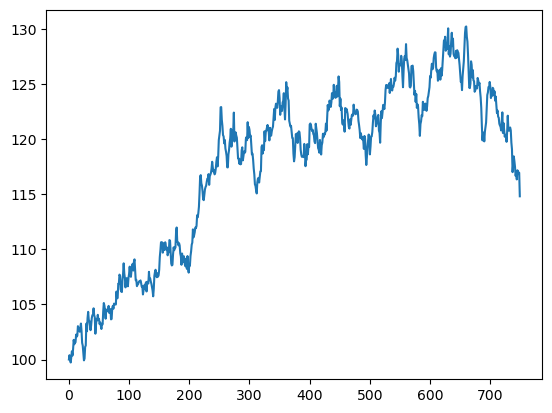

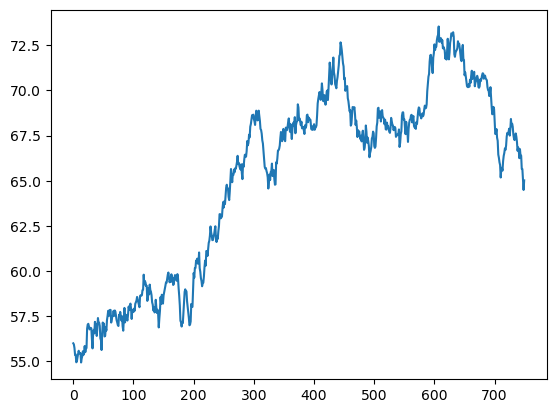

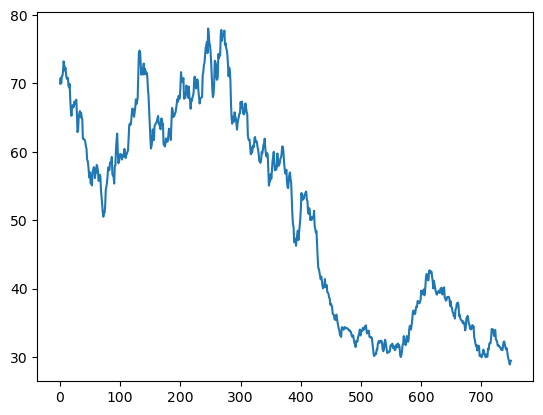

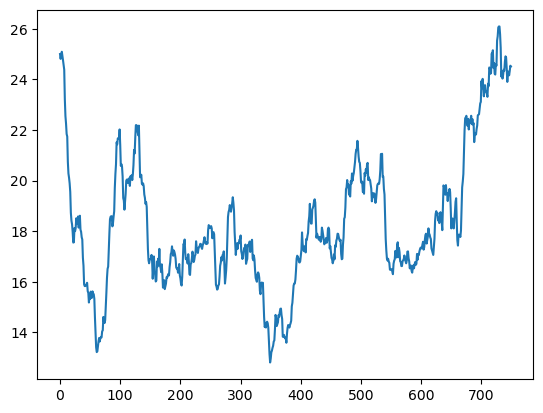

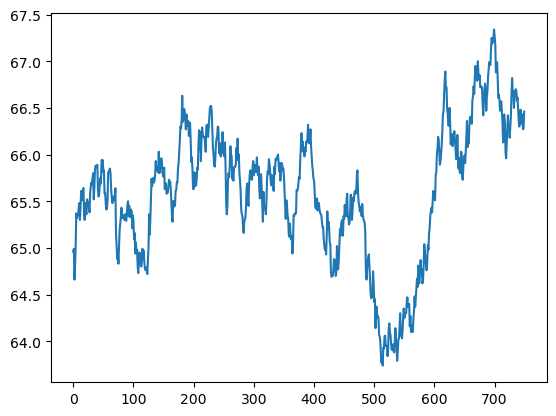

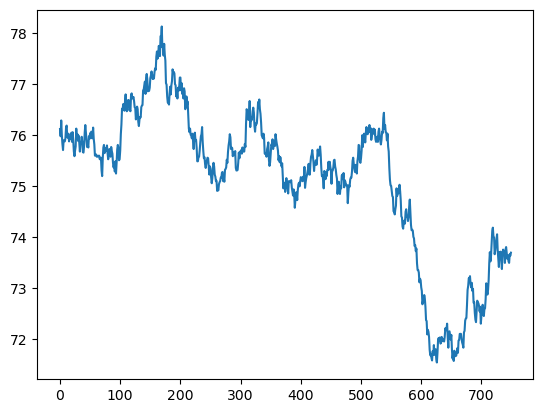

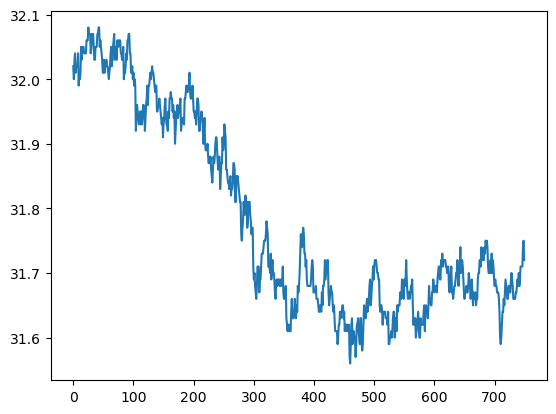

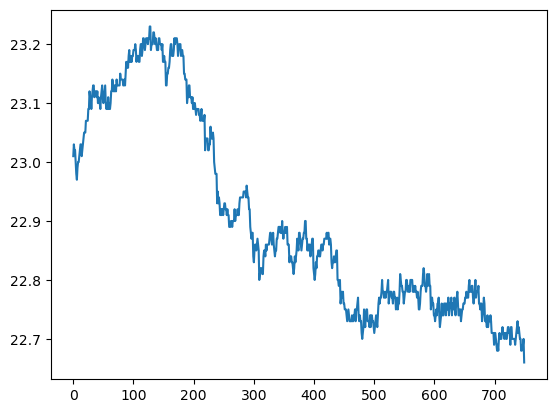

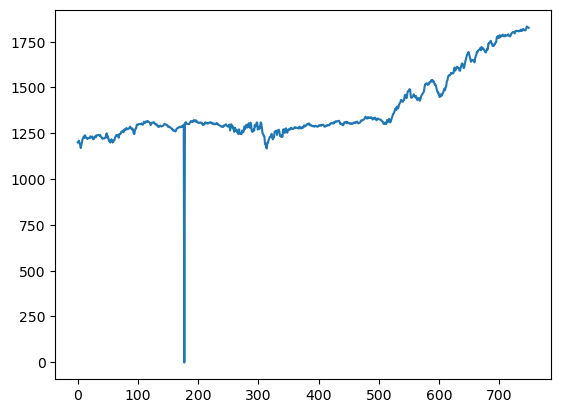

In [14]:
import matplotlib.pyplot as plt

 

We see that the column IX50 has an outlier. To replace the cell where there is the outlier value we do as before, that is, we replace this value by the average between the value before and the value after this cell.

In [15]:
for i in range(len(df)):
    if df['IX50'][i] < 250:
        df['IX50'][i] = (df['IX50'][i - 1] + df['IX50'][i + 1]) / 2

C:\Users\valou\AppData\Local\Temp\ipykernel_14192\66662629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IX50'][i] = (df['IX50'][i - 1] + df['IX50'][i + 1]) / 2


# Model Development 

First, we load the libraries that we are going to need and we set the seed for reproducibility.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import EarlyStopping

set_seed(0)
np.random.seed(0)

We define some functions and initialize variables that will help us handle the data and then make predictions later on. 
start and end variables will help us go through all the rows of each columns.

The function `plot-predictions` allow us to plot the actual test data in gray and the predicted data (using our Neural Network model) in red for each stock in the data frame; to see how our model predicted basically.

The function `split_sequence` creates sequences of input-output pairs for our data. 

Finally, the function `train_test_split` selects data for training using the 'start' and 'end' points we initialized earlier and creates 'train' and 'test' datasets for each stock in the data frame. 

In [17]:
start = 0
end = 625

def plot_predictions(test, predicted, stock):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(str(stock)+ " Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel(str(stock)+ " Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 5:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def train_test_split(dataset, start, end, stock):
    train = dataset[[stock, "Macro Environment"]].loc[f"{start}":f"{end}"].values
    test = dataset.loc[f"{end+1}":, stock].values
    return train, test

pred_tot = []
true_val=[]

Then, we implement our model. We decided to implement a LSTM NN model. Indeed, LSTMs are designed to capture long-range dependencies within sequences. In our context, this means they can potentially learn and remember patterns, trends, and relationships over extended time intervals, making them effective for forecasting prices of each of our stocks. However, they are not known for their speed.

For each stock, we split the data into training and test sets using the train_test_split function defined earlier.
We normalize each stock because it helps to ensure that the LSTM model trains more effectively by having the input data within a consistent and manageable range, improving the convergence and learning process.

We prepare the training sequences and reshapes them for our LSTM model.

Then, we implement our LSTM model. Our LSTM model is going to take the last 10 prices for each stock to predict the next price. 
We decided to choose 1000 neurons to have a better performing model. However, it takes a long time to run so we could have used 100 neurons instead but it would have altered the performance.

We decided to choose :
- RMSprop as the optimizer because it is helpful in training deep neural networks like ours and preventing the learning rate from being too high or too low, which might cause slow convergence or divergence.
- MSE as the loss function because it is suitable for regression problems like stock price prediction.

We introduce the input df_validation in our function so that you just have to download your test2 set and all runs smoothly, so by default its value is set to None.

Finally, we prepare the data for prediction. We select a portion of data for prediction, we make predictions using the trained LSTM model and we inverse transforms the predicted values to their original scale. Then, we store the predicted and true values to use them later and we plot the actual test data against the predicted stock prices for each stock.

**Warning : this code takes 1h20mn to run. We know it's a long time we didn't find a way to time optimize the code without altering the performance**

In [18]:
def strat_prediction(df_model, df_validation = None):
    for stock in df_model.columns[3:]:
        print(stock)
        train, test = train_test_split(df_model, start, end, stock)
        sc = MinMaxScaler(feature_range=(0, 1))
        training_norm = train
        training_norm[:,0] = sc.fit_transform(train[:,0].reshape(-1,1)).reshape(626)
        n_steps = 10
        features = 1
        # split into samples
        X_train, y_train = split_sequence(training_norm, n_steps)
        # Reshaping X_train for model
        X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],2)
        # The LSTM architecture
        model_lstm = Sequential()
        model_lstm.add(LSTM(units=1000, activation="tanh", input_shape=(n_steps, 2)))
        model_lstm.add(Dense(units=1))
        # Compiling the model
        model_lstm.compile(optimizer="RMSprop", loss="mse")
        model_lstm.summary()

        model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

        dataset_total = df_model.loc[:,stock]
        if df_validation == None: 
            inputs = df_model[[stock, "Macro Environment"]][len(dataset_total) - len(test) - n_steps :].values
            #inputs = inputs.reshape(-1, 1)
            #scaling
            inputs[:,0] = sc.fit_transform(inputs[:,0].reshape(-1,1)).reshape(134)

            # Split into samples
            X_test, y_test = split_sequence(inputs, n_steps)
            # reshape
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)
            #prediction
            predicted_stock_price = model_lstm.predict(X_test)
            #inverse transform the values
            predicted_stock_price = sc.inverse_transform(predicted_stock_price)
            pred_tot.append(predicted_stock_price)
            true_val.append(df_model[stock][624:].values)
            plot_predictions(test,predicted_stock_price, stock)
        else : 
            inputs = df_validation[[stock, "Macro Environment"]][len(df_validation) - n_steps :].values
            #inputs = inputs.reshape(-1, 1)
            #scaling
            inputs[:,0] = sc.fit_transform(inputs[:,0].reshape(-1,1)).reshape(len(inputs))

            # Split into samples
            X_test, y_test = split_sequence(inputs, n_steps)
            # reshape
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)
            #prediction
            predicted_stock_price = model_lstm.predict(X_test)
            #inverse transform the values
            predicted_stock_price = sc.inverse_transform(predicted_stock_price)
            pred_tot.append(predicted_stock_price)
            true_val.append(df_validation[stock].values)
            plot_predictions(test,predicted_stock_price, stock)
    return pred_tot, true_val


df_validation is the data frame on which we want to apply our model, if None, this is the predefined Test data frame.

ABC 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000)              4012000   
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 45s 337ms/step - loss: 0.1887
Epoch 2/100
20/20 [==============================] - 6s 282ms/step - loss: 0.0160
Epoch 3/100
20/20 [==============================] - 7s 326ms/step - loss: 0.0129
Epoch 4/100
20/20 [==============================] - 8s 395ms/step - loss: 0.0152
Epoch 5/100
20/20 [==============================] - 7s 357ms/step - loss: 0.0

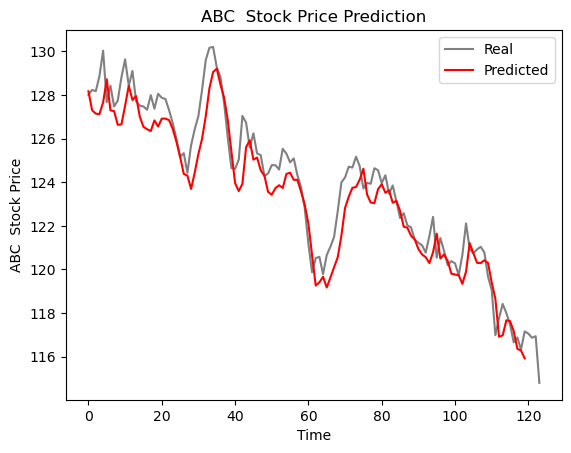

MKV
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 7s 252ms/step - loss: 0.1931
Epoch 2/100
20/20 [==============================] - 5s 233ms/step - loss: 0.0121
Epoch 3/100
20/20 [==============================] - 5s 235ms/step - loss: 0.0133
Epoch 4/100
20/20 [==============================] - 5s 232ms/step - loss: 0.0138
Epoch 5/100
20/20 [==============================] - 6s 284ms/step - loss: 0.0

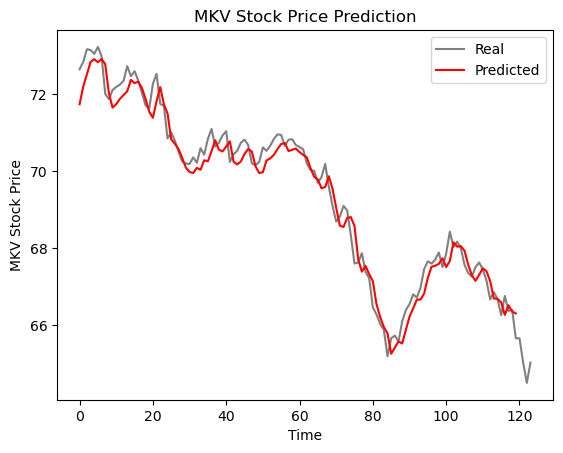

YYT
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 7s 236ms/step - loss: 0.1442
Epoch 2/100
20/20 [==============================] - 5s 237ms/step - loss: 0.0163
Epoch 3/100
20/20 [==============================] - 5s 242ms/step - loss: 0.0126
Epoch 4/100
20/20 [==============================] - 5s 242ms/step - loss: 0.0195
Epoch 5/100
20/20 [==============================] - 5s 244ms/step - loss: 0.0

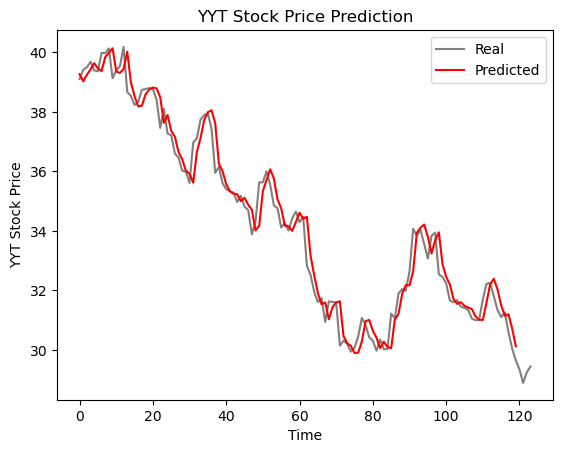

PLO
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 6s 230ms/step - loss: 0.1543
Epoch 2/100
20/20 [==============================] - 5s 228ms/step - loss: 0.0110
Epoch 3/100
20/20 [==============================] - 5s 228ms/step - loss: 0.0110
Epoch 4/100
20/20 [==============================] - 5s 247ms/step - loss: 0.0078
Epoch 5/100
20/20 [==============================] - 5s 234ms/step - loss: 0.0

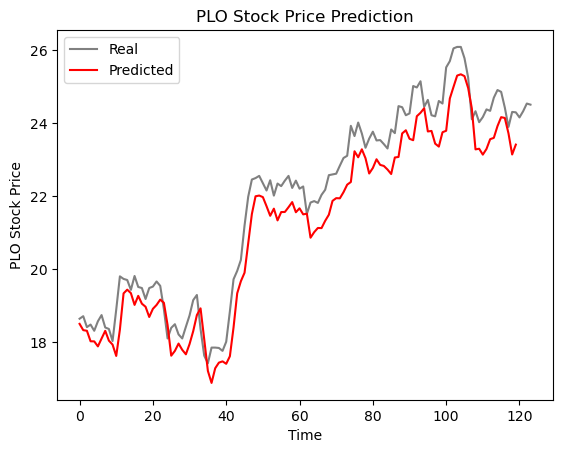

ERS
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_4 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 6s 227ms/step - loss: 0.1698
Epoch 2/100
20/20 [==============================] - 5s 265ms/step - loss: 0.0160
Epoch 3/100
20/20 [==============================] - 5s 238ms/step - loss: 0.0190
Epoch 4/100
20/20 [==============================] - 5s 240ms/step - loss: 0.0160
Epoch 5/100
20/20 [==============================] - 5s 269ms/step - loss: 0.0

20/20 [==============================] - 7s 330ms/step - loss: 0.0020
Epoch 92/100
20/20 [==============================] - 6s 319ms/step - loss: 0.0019
Epoch 93/100
20/20 [==============================] - 7s 328ms/step - loss: 0.0021
Epoch 94/100
20/20 [==============================] - 6s 317ms/step - loss: 0.0021
Epoch 95/100
20/20 [==============================] - 6s 319ms/step - loss: 0.0019
Epoch 96/100
20/20 [==============================] - 7s 343ms/step - loss: 0.0020
Epoch 97/100
20/20 [==============================] - 6s 317ms/step - loss: 0.0019
Epoch 98/100
20/20 [==============================] - 6s 325ms/step - loss: 0.0020
Epoch 99/100
20/20 [==============================] - 7s 335ms/step - loss: 0.0020
Epoch 100/100
4/4 [==============================] - 2s 54ms/step


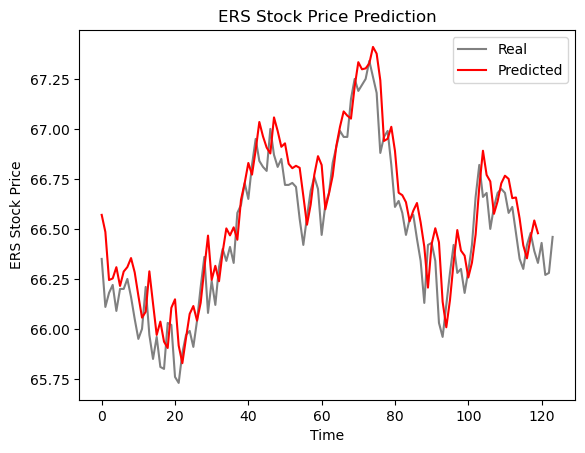

HUY
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_5 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 10s 314ms/step - loss: 0.2365
Epoch 2/100
20/20 [==============================] - 6s 318ms/step - loss: 0.0127
Epoch 3/100
20/20 [==============================] - 6s 322ms/step - loss: 0.0153
Epoch 4/100
20/20 [==============================] - 6s 322ms/step - loss: 0.0169
Epoch 5/100
20/20 [==============================] - 7s 329ms/step - loss: 0.

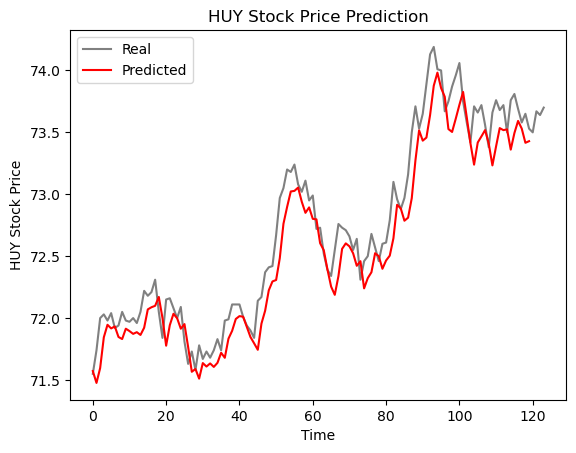

MON 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_6 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 12s 332ms/step - loss: 0.1678
Epoch 2/100
20/20 [==============================] - 7s 339ms/step - loss: 0.0085
Epoch 3/100
20/20 [==============================] - 7s 336ms/step - loss: 0.0142
Epoch 4/100
20/20 [==============================] - 7s 338ms/step - loss: 0.0145
Epoch 5/100
20/20 [==============================] - 7s 352ms/step - loss: 0

20/20 [==============================] - 7s 354ms/step - loss: 0.0014
Epoch 92/100
20/20 [==============================] - 8s 383ms/step - loss: 0.0016
Epoch 93/100
20/20 [==============================] - 7s 359ms/step - loss: 0.0015
Epoch 94/100
20/20 [==============================] - 7s 355ms/step - loss: 0.0014
Epoch 95/100
20/20 [==============================] - 7s 345ms/step - loss: 0.0017
Epoch 96/100
20/20 [==============================] - 7s 350ms/step - loss: 0.0014
Epoch 97/100
20/20 [==============================] - 7s 339ms/step - loss: 0.0016
Epoch 98/100
20/20 [==============================] - 7s 346ms/step - loss: 0.0016
Epoch 99/100
20/20 [==============================] - 7s 347ms/step - loss: 0.0016
Epoch 100/100
4/4 [==============================] - 1s 63ms/step


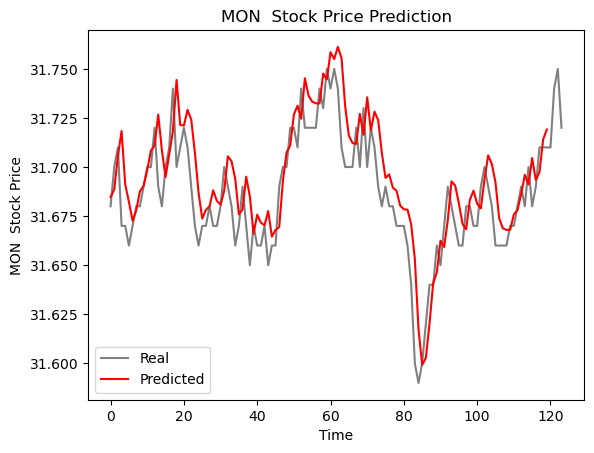

AQE
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 11s 338ms/step - loss: 0.1768
Epoch 2/100
20/20 [==============================] - 6s 320ms/step - loss: 0.0125
Epoch 3/100
20/20 [==============================] - 7s 334ms/step - loss: 0.0108
Epoch 4/100
20/20 [==============================] - 8s 405ms/step - loss: 0.0100
Epoch 5/100
20/20 [==============================] - 7s 345ms/step - loss: 0.

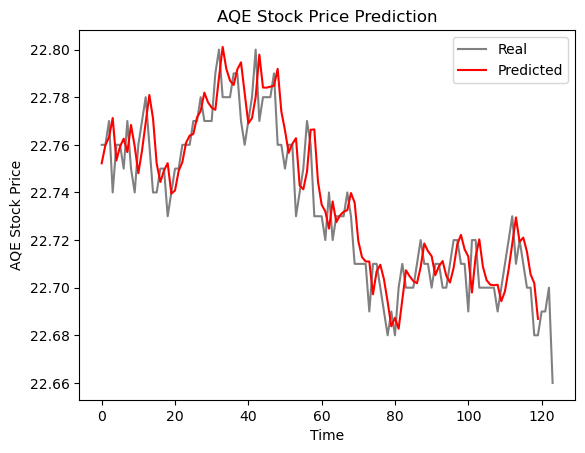

IX50
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1000)              4012000   
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4013001 (15.31 MB)
Trainable params: 4013001 (15.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
20/20 [==============================] - 11s 335ms/step - loss: 0.1334
Epoch 2/100
20/20 [==============================] - 6s 323ms/step - loss: 0.0087
Epoch 3/100
20/20 [==============================] - 7s 332ms/step - loss: 0.0099
Epoch 4/100
20/20 [==============================] - 7s 367ms/step - loss: 0.0083
Epoch 5/100
20/20 [==============================] - 6s 280ms/step - loss: 0

In [ ]:
results = strat_prediction(df, df_validation = None)

# Trading Strategy development

Our strategy work as follows:

- If at time t, our prediction says that at time t+1 the stock is going down then we sell all this stock.
- Among the stocks that we predicted are going up at t+1, we first buy a maximum of the stock that rises the most, we then buy as much as we can of the second stock predicted to rise the most, and so on until we have reached the end of time.

Our algorithm follows these rules:

- You start with a portfolio worth 1Million (in Cash)
- Interest  rate = 0
- You can only go long on an integer number of stocks. 
- You cannot borrow , neither go short. 
- Before buying new stock, you need to first sale some other to have the cash (no direct stock conversion)
- There is only one price per day. At which you sell and buy.
- The last day you sell all your assets and get the cash.

The code outputs the final cash amount and a list of portfolio values at each step, aiding in the assessment of the trading strategy's performance.

In [ ]:
def result_strat(pred_tot, true_val):
    cash = 1000000
    wallet = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    money = []
    cash2 = cash
    value_port = []
    for i in range(len(pred_tot[0])):
        buy = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        money += [cash2]
        cash2 = cash
        for j in range(9):
            if pred_tot[j][i] >= true_val[j][i]:
                buy[j] = (pred_tot[j][i] / true_val[j][i])[0]

        max = np.argmax(buy)
        wallet[max] = wallet[max] + cash // true_val[max][i]
        cash = cash - (cash // true_val[max][i]) * true_val[max][i]
        for j in range(9):
            if pred_tot[j][i] < true_val[j][i]:
                cash = cash + true_val[j][i] * wallet[j]
                wallet[j] = 0
        for j in range(9):
            if (pred_tot[j][i] / true_val[j][i])[0] < buy[max]:
                cash = cash + true_val[j][i] * wallet[j]
                wallet[j] = 0
        cash2 = cash
        for j in range(9):
            cash2 = cash2 + true_val[j][i] * wallet[j]
        value_port.append(cash + sum(x[i] * y for x, y in zip(true_val, wallet)))
    cash = cash + sum(x[i] * y for x, y in zip(true_val, wallet))
    return cash, value_port

In [ ]:
data_final = result_strat(results[0], results[1])
data_final

# Evaluation 

There are a number of performance indicators that tells if the strategy is good or not :

•    Average annualized expected return  
•	Annualized sharpe ratio on training  
•	Maximum drawdown   

We compute these indicators for our strategy.

In [45]:
def average_annualized_ret(prices):
    returns = [(Pt - Pt_1) / Pt_1 * 100 for Pt, Pt_1 in zip(prices[1:], prices[:-1])]
    return np.mean(returns, dtype=np.float64)*252

average_annualized_ret(data_final[1])

117.91366777206024

In [46]:
def Sharpe_ratio(prices):
    returns = [(Pt - Pt_1) / Pt_1 * 100 for Pt, Pt_1 in zip(prices[1:], prices[:-1])]
    return (np.mean(returns, dtype=np.float64)*252)/(np.std(returns, dtype=np.float64)*np.sqrt(252))

Sharpe_ratio(data_final[1])

7.245925983927067

In [47]:
def maxDD(val: pd.DataFrame):
    max_to_date = val.cummax()
    rel_loss = (max_to_date - val) / max_to_date
    return rel_loss.max()

maxDD(pd.DataFrame(data = data_final[1]))

0    0.006751
dtype: float64

Based on these metrics, our strategy seems to be quite impressive, we have:

- High Expected Return: An average annualized expected return of 117.91% is notably high, suggesting the potential for significant gains.
- Excellent Sharpe Ratio: A Sharpe ratio of 7.25 is exceptional and indicates a strong risk-adjusted performance.
- Low Drawdown: The maximum drawdown of 0.006751 is relatively small, indicating that the strategy managed to limit losses during down markets.